# Similarities and Differences of Top vs. Bottom 20% (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '2_June'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df_bottom_20 = pd.read_parquet("Bottom_20_gambles.parquet")
df_top_20 = pd.read_parquet("Top_20_gambles.parquet")

# Eliminate players who maximum number of gambles is 1
df_bottom_20 = df_bottom_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)
df_top_20 = df_top_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)

# Reset index
df_bottom_20.index = np.arange(1, len(df_bottom_20) + 1)
df_top_20.index = np.arange(1, len(df_top_20) + 1)

# Round wageredamt and profit to 2 decimal places
df_bottom_20['wageredamt'] = df_bottom_20['wageredamt'].round(1)
df_bottom_20['profit'] = df_bottom_20['profit'].round(1)
df_bottom_20['percent_return'] = df_bottom_20['percent_return'].round(1)
df_top_20['wageredamt'] = df_top_20['wageredamt'].round(1)
df_top_20['profit'] = df_top_20['profit'].round(1)
df_top_20['percent_return'] = df_top_20['percent_return'].round(1)

In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_bottom_20['result_type'] = df_bottom_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_bottom_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_bottom_20 = pd.concat([df_bottom_20, dummy_variables], axis=1).reset_index(drop=True)

# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_top_20['result_type'] = df_top_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_top_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_top_20 = pd.concat([df_top_20, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df_bottom_20['start_time'] = pd.to_datetime(df_bottom_20['start_time'])

df_top_20['start_time'] = pd.to_datetime(df_top_20['start_time'])


In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df_bottom_20['time_diff'] = df_bottom_20.groupby(['playerkey', 'session_time'])['start_time'].diff()
df_top_20['time_diff'] = df_top_20.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df_bottom_20['time_diff'] = df_bottom_20['time_diff'].dt.total_seconds().fillna(0)
df_top_20['time_diff'] = df_top_20['time_diff'].dt.total_seconds().fillna(0)


## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in bottom 20%:", len(df_bottom_20['playerkey'].unique()))
print("Number of gamblers in top 20%:", len(df_top_20['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in bottom 20%:", len(df_bottom_20['visit'].unique()))
print("Number of unique visits in top 20%:", len(df_top_20['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in bottom 20%:", len(df_bottom_20['session_time'].unique()))
print("Number of unique sessions in top 20%:", len(df_top_20['session_time'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions on session_machine
print("Number of unique sessions on session_machine in bottom 20%:", len(df_bottom_20['session_machine'].unique()))
print("Number of unique sessions on session_machine in top 20%:", len(df_top_20['session_machine'].unique()))




Number of gamblers in bottom 20%: 56
Number of gamblers in top 20%: 57
--------------------------------------------------
Number of unique visits in bottom 20%: 1
Number of unique visits in top 20%: 1
--------------------------------------------------
Number of unique sessions in bottom 20%: 2
Number of unique sessions in top 20%: 6
--------------------------------------------------
Number of unique sessions on session_machine in bottom 20%: 6
Number of unique sessions on session_machine in top 20%: 436


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_bottom_20 = pf.consecutive_wins(df_bottom_20, 'visit')
df_top_20 = pf.consecutive_wins(df_top_20, 'visit')


In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_bottom_20.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')
print('Top 20')
print(df_top_20.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())

Bottom 20
       #2ws  #3ws  #4ws
visit                  
1      11.0   0.0   0.0
--------------------------------------------------
Top 20
        #2ws   #3ws  #4ws
visit                    
1      640.0  106.0  30.0


In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df_bottom_20_s = pf.consecutive_wins(df_bottom_20, 'session_time')
df_top_20_s = pf.consecutive_wins(df_top_20, 'session_time')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_bottom_20_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')
print('Top 20')
print(df_top_20_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())

Bottom 20
              #2ws  #3ws  #4ws
session_time                  
1             11.0   0.0   0.0
2              0.0   0.0   0.0
--------------------------------------------------
Top 20
               #2ws  #3ws  #4ws
session_time                   
1             406.0  59.0  17.0
2             146.0  31.0   8.0
3              62.0   9.0   4.0
4              15.0   3.0   1.0
5               5.0   2.0   0.0
6               5.0   2.0   0.0


### Rank Differences

Number of unique players in bottom 20%:
rank
1.0    37
2.0     2
3.0     4
6.0    13
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
rank
1.0    30
2.0     8
3.0     5
6.0    14
Name: playerkey, dtype: int64
--------------------------------------------------


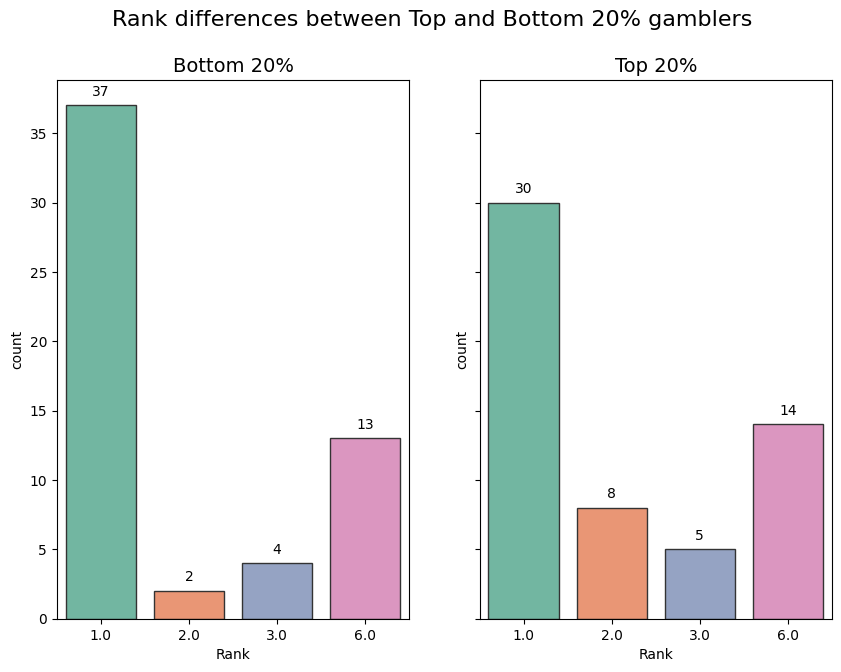

In [10]:
# For every unique rank, print the number of unique players
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('rank', df_top_20, df_bottom_20, title='Rank', figsize=(10, 7))

### Gender Differences

Number of unique players in bottom 20%:
gender
F    21
M    35
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
gender
F    25
M    32
Name: playerkey, dtype: int64
--------------------------------------------------


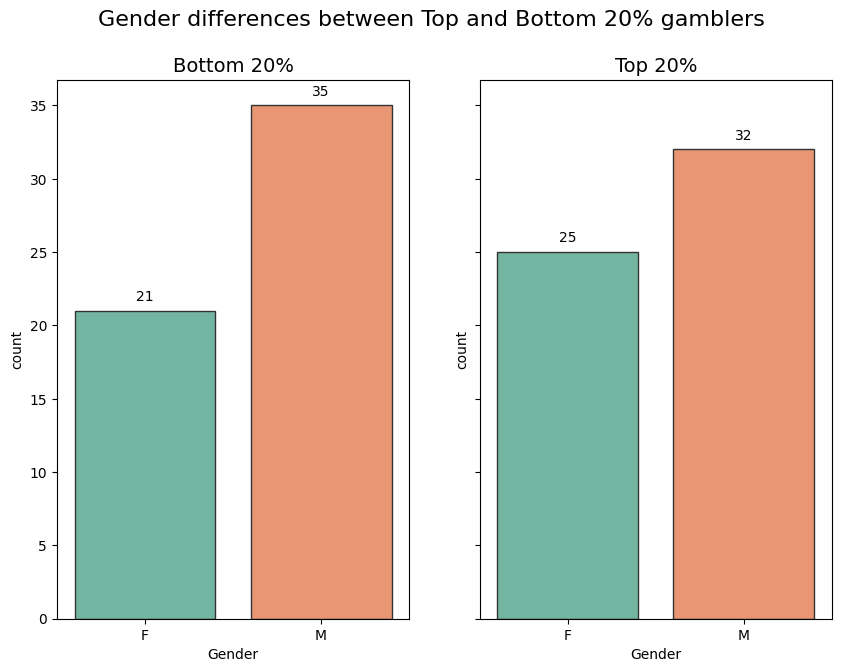

In [11]:
# Gender differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('gender', df_top_20, df_bottom_20, title='Gender', figsize=(10, 7))

### Age Differences

In [12]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for bottom 20% and top 20%
df_bottom_20['age_range'] = pd.cut(df_bottom_20['age'], bins=bins, labels=labels, right=False)
df_bottom_20['age_gen'] = pd.cut(df_bottom_20['age'], bins=bins, labels=generations, right=False)

df_top_20['age_range'] = pd.cut(df_top_20['age'], bins=bins, labels=labels, right=False)
df_top_20['age_gen'] = pd.cut(df_top_20['age'], bins=bins, labels=generations, right=False)

Number of unique players in bottom 20%:
age_range
18-24     0
25-40    20
41-55    19
56-75    14
76+       3
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_range
18-24     0
25-40     9
41-55    21
56-75    25
76+       2
Name: playerkey, dtype: int64
--------------------------------------------------


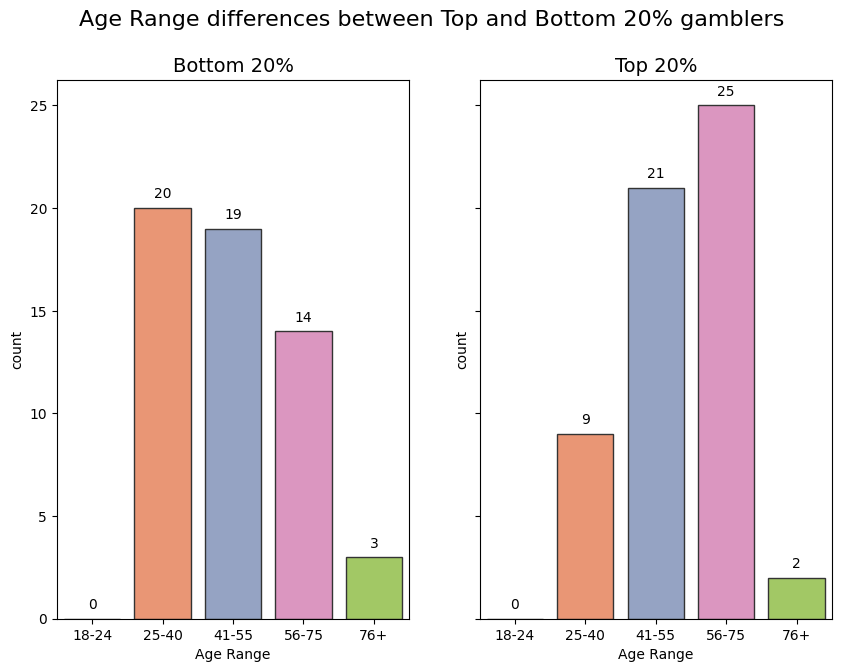

In [13]:
# Age range differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_range', df_top_20, df_bottom_20, title='Age Range', figsize=(10, 7))

Number of unique players in bottom 20%:
age_gen
Gen Z            0
Millenials      20
Gen X           19
Baby Boomers    14
Silent           3
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_gen
Gen Z            0
Millenials       9
Gen X           21
Baby Boomers    25
Silent           2
Name: playerkey, dtype: int64
--------------------------------------------------


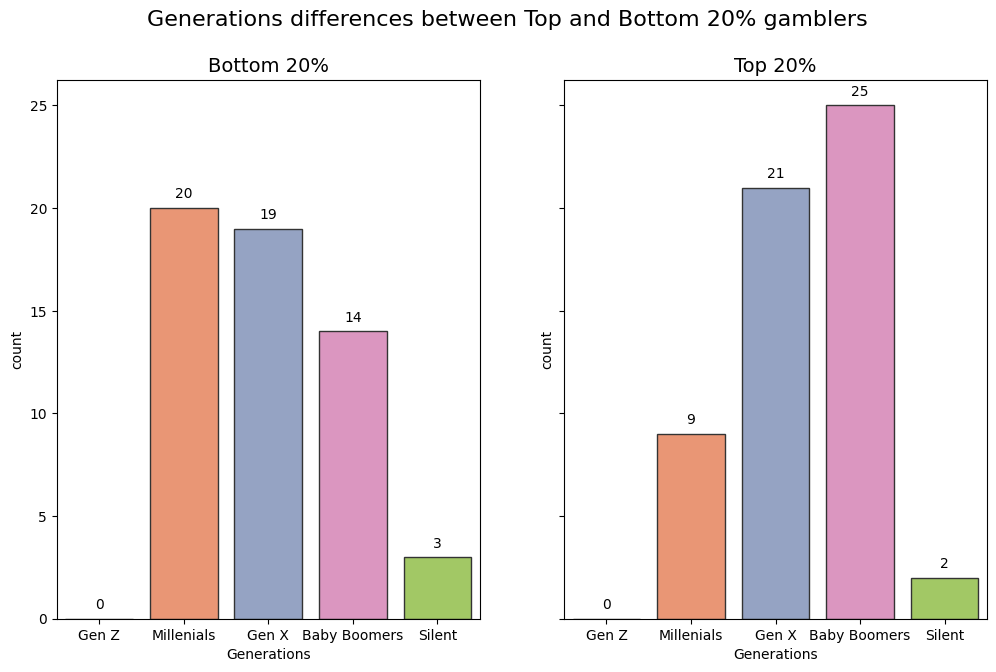

In [14]:
# Age generation differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_gen', df_top_20, df_bottom_20, title='Generations', figsize=(12, 7))


Male age differences in bottom 20%:
age_range
18-24     0
25-40    12
41-55    12
56-75     8
76+       3
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in bottom 20%:
age_range
18-24    0
25-40    8
41-55    7
56-75    6
76+      0
Name: playerkey, dtype: int64


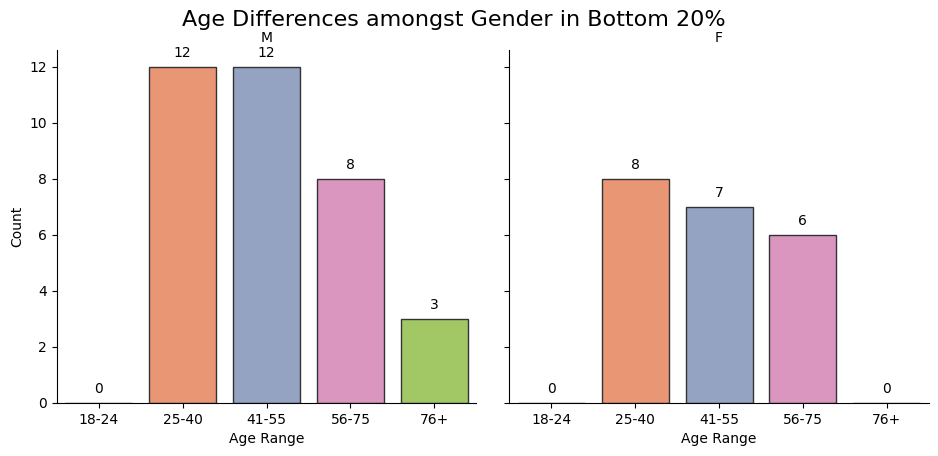

In [15]:
# Age range of male gamblers in bottom 20%
print("Male age differences in bottom 20%:")
print(df_bottom_20[df_bottom_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in bottom 20%
print('Female age differences in bottom 20%:')
print(df_bottom_20[df_bottom_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df_bottom_20, 'Bottom 20%', figsize=(10, 5))


Male age differences in top 20%:
age_range
18-24     0
25-40     8
41-55    11
56-75    12
76+       1
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in top 20%:
age_range
18-24     0
25-40     1
41-55    10
56-75    13
76+       1
Name: playerkey, dtype: int64
--------------------------------------------------


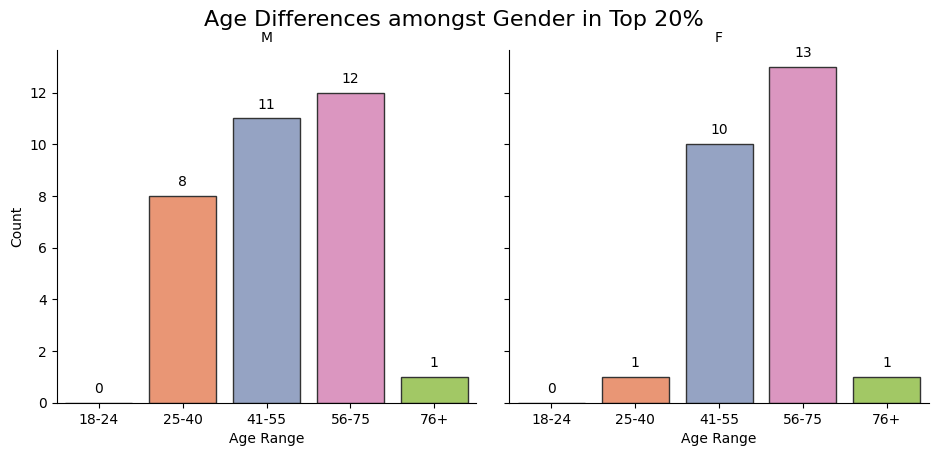

In [16]:
# Age range of male gamblers in top 20%
print("Male age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of female gamblers in top 20%
print("Female age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot gender differences
pf.plot_gender_diff(df_top_20, 'Top 20%', figsize=(10, 5))

### Increse and Decrease of SlotDenomination and Bet

In [17]:
# Lets cound the number of times a player increase slot denominations
players_increase_slot_t20 = cf.count_increase(df_top_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_t20 = cf.count_decrease(df_top_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_t20 = cf.count_increase(df_top_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_t20 = cf.count_decrease(df_top_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 34
Count of times each player increase_slotdeno : {17: 1, 19: 3, 20: 26, 29: 25, 33: 15, 43: 1, 69: 1, 89: 2, 90: 1, 92: 1, 103: 3, 135: 1, 144: 15, 159: 5, 188: 1, 194: 1, 222: 4, 224: 2, 234: 6, 244: 1, 263: 1, 264: 12, 308: 3, 313: 1, 319: 1, 322: 2, 331: 5, 351: 1, 361: 1, 363: 50, 410: 1, 461: 1, 475: 171, 507: 1}
Player who changes the most: 475
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_slotdeno : 31
Count of times each player decrease_slotdeno : {17: 1, 19: 2, 20: 24, 29: 25, 33: 14, 43: 1, 69: 2, 89: 2, 99: 1, 103: 4, 135: 1, 144: 15, 159: 7, 188: 1, 222: 4, 224: 3, 234: 5, 244: 1, 263: 1, 264: 13, 308: 2, 322: 2, 331: 4, 351: 1, 361: 1, 363: 48, 410: 1, 461: 1, 475: 172, 507: 1, 521: 1}
Player who changes the most: 475
------------------------------------------------------------------------------------------------------------------
Cou

In [18]:
# Lets do the same but for bottom 20%
players_increase_slot_b20 = cf.count_increase(df_bottom_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_b20 = cf.count_decrease(df_bottom_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_b20 = cf.count_increase(df_bottom_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_b20 = cf.count_decrease(df_bottom_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 4
Count of times each player increase_slotdeno : {67: 1, 219: 1, 223: 1, 248: 1}
Player who changes the most: 67
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_slotdeno : 1
Count of times each player decrease_slotdeno : {406: 1}
Player who changes the most: 406
------------------------------------------------------------------------------------------------------------------
Count of players who increase_maxbet : 3
Count of times each player increase_maxbet : {164: 1, 236: 1, 406: 1}
Player who changes the most: 164
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_maxbet : 6
Count of times each player decrease_maxbet : {67: 1, 219: 1, 223: 1, 236: 2, 389: 1, 457: 1}
Player who changes the most: 236
----------------------------------------------------------

### Wealth Differences
#### General

In [19]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_bottom_20['depletion_rate'] = df_bottom_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)
df_top_20['depletion_rate'] = df_top_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


Total amount won or lost by all players in bottom 20%:
-942.56006
Average amount won or lost by each player in bottom 20%:
-16.83
-------------------------------------------------------
Total amount won or lost by all players in top 20%:
244.61035
Average amount won or lost by each player in top 20%:
4.29


Text(0.5, 0, 'Ending Balance')

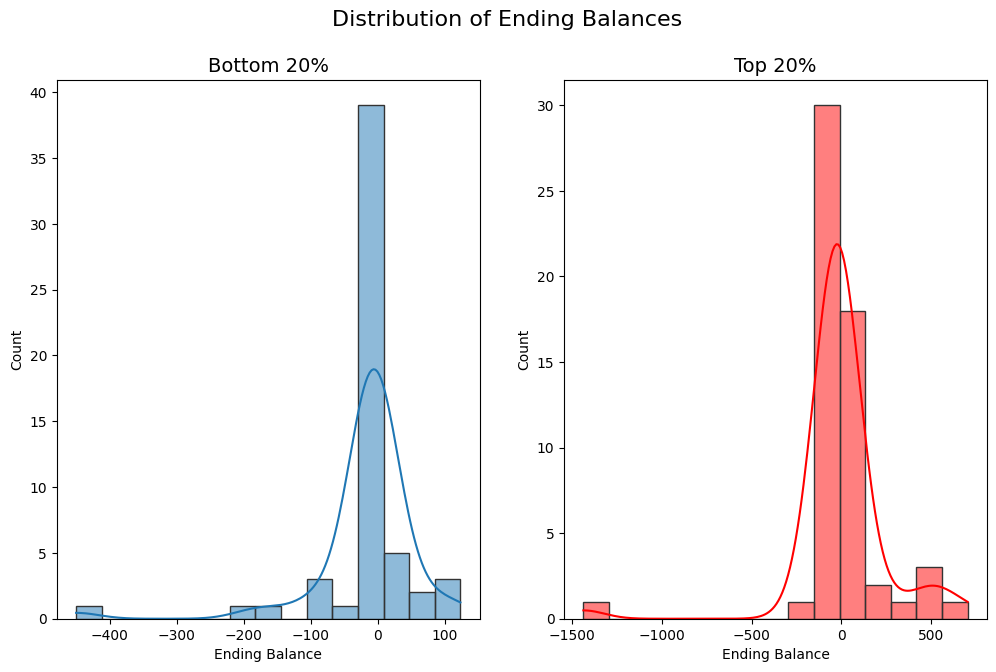

In [20]:
# Total amoun lost or won by all players in bottom 20%
# Group by 'playerkey'
grouped_b = df_bottom_20.groupby('playerkey')

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Calculate the total amount won or lost by all players
b_amount_won_lost_total = grouped_b['playercashableamt'].last().sum() - grouped_b['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
b_amount_won_lost_avg = b_amount_won_lost_total / len(grouped_b)

# Total amoun lost or won by all players in top 20%
# Group by 'playerkey'
grouped_t = df_top_20.groupby('playerkey')

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

# Calculate the total amount won or lost by all players
t_amount_won_lost_total = grouped_t['playercashableamt'].last().sum() - grouped_t['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
t_amount_won_lost_avg = t_amount_won_lost_total / len(grouped_t)

# Prin Results
print('Total amount won or lost by all players in bottom 20%:')
print(b_amount_won_lost_total)
print('Average amount won or lost by each player in bottom 20%:')
print(round(b_amount_won_lost_avg, 2))
print('-------------------------------------------------------')
print('Total amount won or lost by all players in top 20%:')
print(t_amount_won_lost_total)
print('Average amount won or lost by each player in top 20%:')
print(round(t_amount_won_lost_avg, 2))

# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# Set Title
fig.suptitle('Distribution of Ending Balances', fontsize=16)
# Plot histogram of amount won or lost by all players in bottom 20%
sns.histplot(b_amount_won_lost_each, ax=ax[0], bins=15, kde=True, edgecolor=".2")
ax[0].set_title('Bottom 20%', fontsize=14)
ax[0].set_xlabel('Ending Balance')

# Plot histogram of amount won or lost by all players in top 20%
sns.histplot(t_amount_won_lost_each, ax=ax[1], bins=15, kde=True, edgecolor=".2", color='red')
ax[1].set_title('Top 20%', fontsize=14)
ax[1].set_xlabel('Ending Balance')

#### Per Visit

In [21]:
# Create dataframe
df_all_v = pf.merge_dfs_per_player(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', print_results=False)

In [22]:
# Simultaneous Play
df_b20_sim_v = pf.simultaneous_play(40000, df_bottom_20, 'visit')
df_t20_sim_v = pf.simultaneous_play(40000, df_top_20, 'visit')

# Concat the two dataframes
df_sim_v = pd.concat([df_b20_sim_v, df_t20_sim_v]).reset_index()

print(df_sim_v)
# Remove repeated instances
df_sim_no_repeat_v = df_sim_v.drop_duplicates(subset=['visit', 'playerkey'])

print(df_sim_no_repeat_v)

   index visit playerkey
0      0     1        38
1      1     1        90
2      2     1        90
3      3     1       144
4      4     1       363
5      5     1       475
   index visit playerkey
0      0     1        38
1      1     1        90
3      3     1       144
4      4     1       363
5      5     1       475


In [23]:
# Merge Sim play
df_all_v['sim_play'] = df_all_v[['playerkey', 'visit']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat_v[['playerkey', 'visit']].values)), axis=1)

print(df_all_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'rank', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'std_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']


df_all_v = df_all_v.reindex(columns=desired_order)

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'unique_machines', 'ave_time_per_machine', 'w/min', 'l/min', 'nh/min',
       'd/min', '2ws/min', '3ws/min', '4ws

##### Distribution Ending Balances

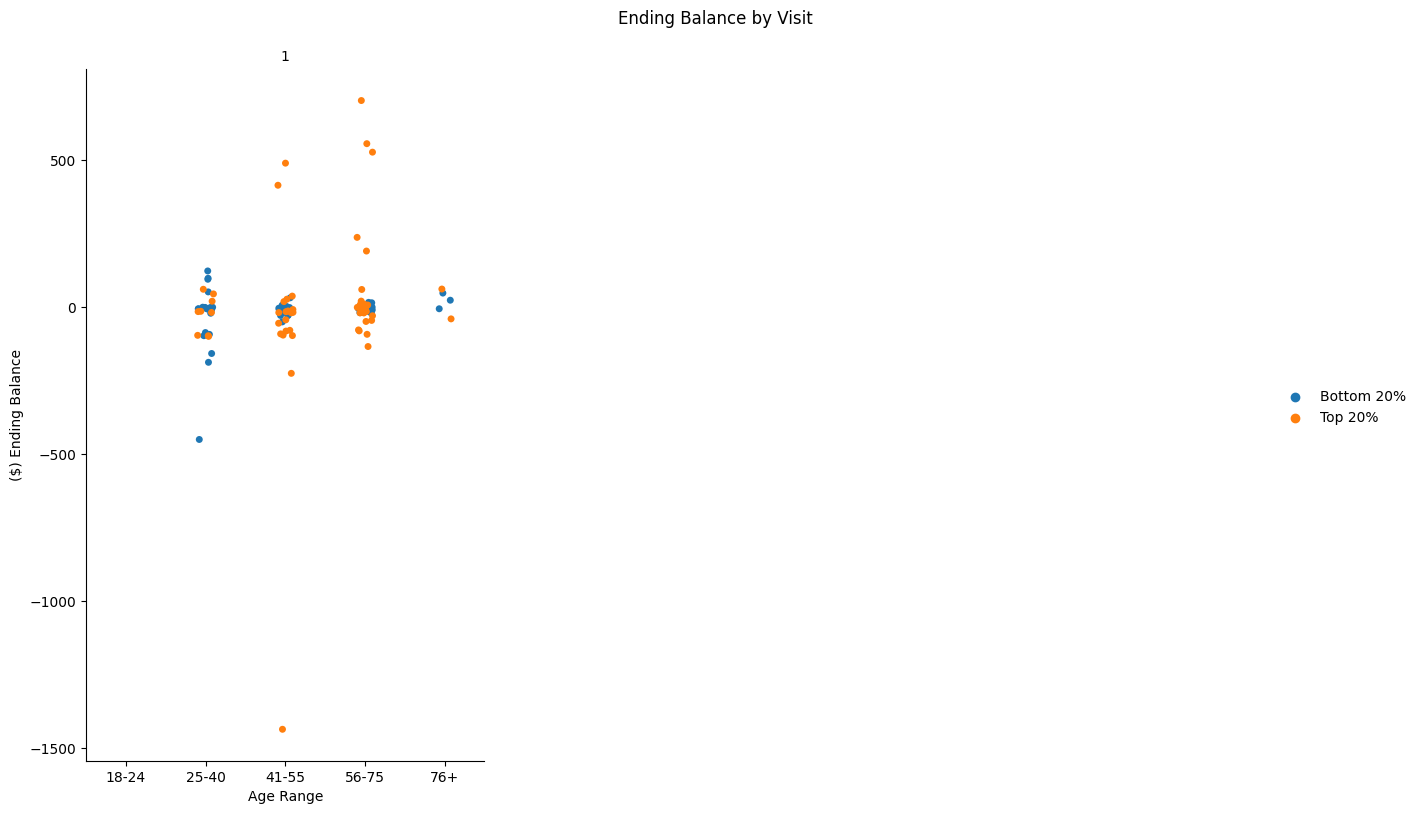

In [24]:
# Save dataframe to paquet file
df_all_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit.parquet')

# print(df_all_v.head(2))

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)

f.fig.set_size_inches(14, 9)


Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, rank, ending_balance, percentile]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, rank, ending_balance, percentile]
Index: []


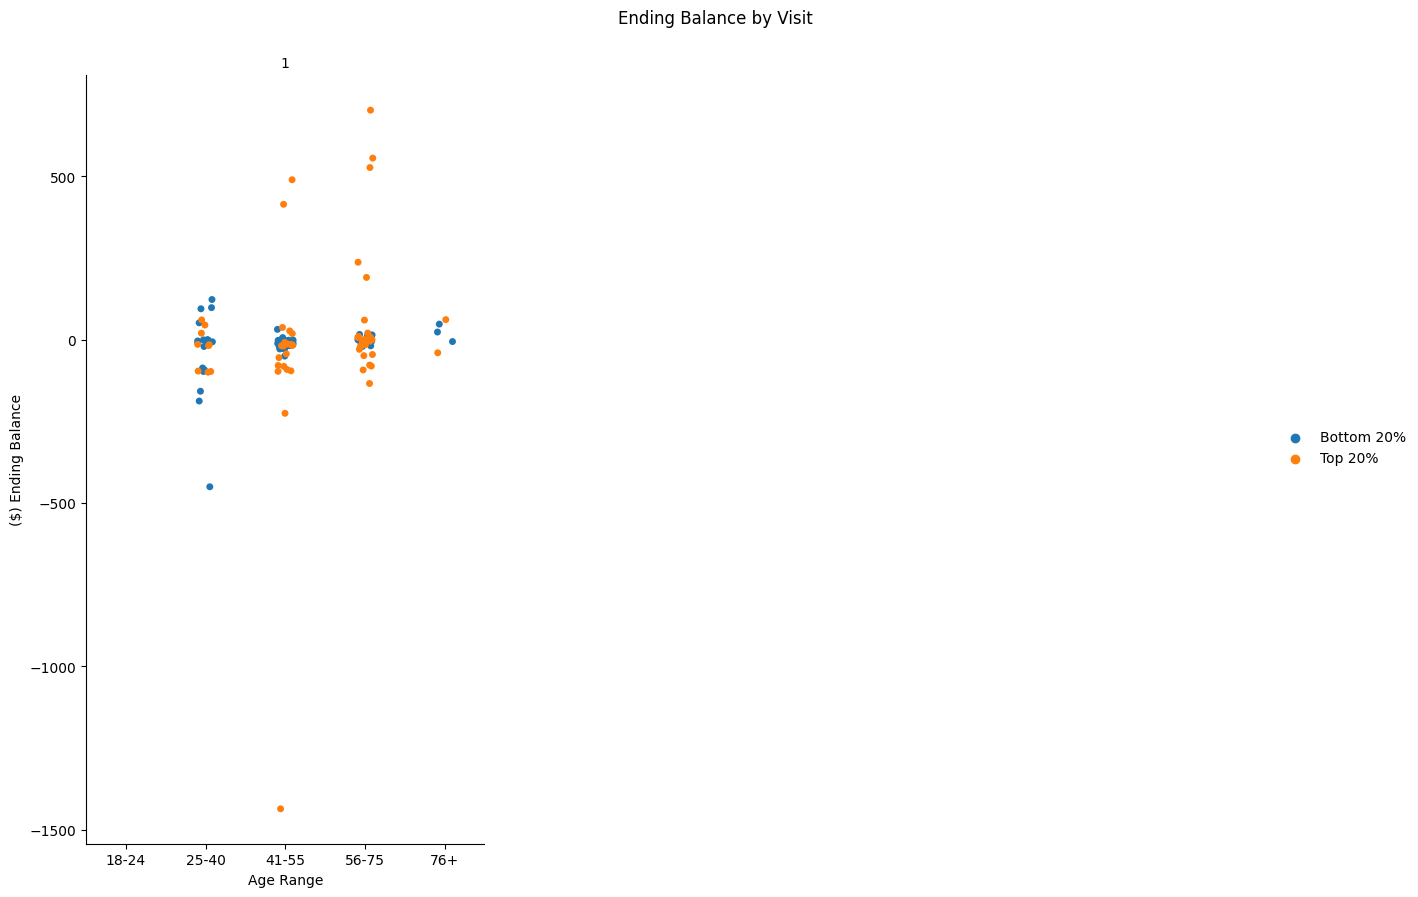

In [25]:
# Outliers - Players who make over the cut_off
df_no_outliers_v = pf.remove_outliers(df_all_v, cut_off=cut_off)

# Save dataframe to paquet file
df_no_outliers_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit_NO.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)
f.fig.set_size_inches(14, 10)


##### Overall Gains/Loses

In [26]:
# With Outliers Present
combined_data = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%     -59.629997
        Top 20%      -1116.820190
M       Bottom 20%    -882.929993
        Top 20%       1361.430054
Name: ending_balance, dtype: float32
-------------------------------------------------------
visit  gender  percentile
1      F       Bottom 20%     -59.629997
               Top 20%      -1116.820190
       M       Bottom 20%    -882.929993
               Top 20%       1361.430054
Name: ending_balance, dtype: float32
-------------------------------------------------------
rank  percentile
1.0   Bottom 20%     -68.910004
      Top 20%         14.849995
2.0   Bottom 20%     -55.349998
      Top 20%       1519.310059
3.0   Bottom 20%    -691.809998
      Top 20%       -867.930115
6.0   Bottom 20%    -126.489990
      Top 20%       -421.619995
Name: ending_balance, dtype: float32


In [27]:
# No Outliers
combined_data_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit_NO.parquet')

Bottom 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
[]
-----------------------------------------------------------------
Top 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, rank, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, rank, age_range, gender, ending_balance]
Index: []
[]
Without Outliers present:
                   ending_balance
gender percentile                
F      Bottom 20%      -59.629997
       Top 20%       -1116.820190
M      Bottom 20%     -882.929993
       Top 20%        1361.430054
-------------------------------------------------------
                         ending_balance
visit gender percentile                
1    

percentile  Bottom 20%      Top 20%
gender                             
F           -59.629997 -1116.820190
M          -882.929993  1361.430054


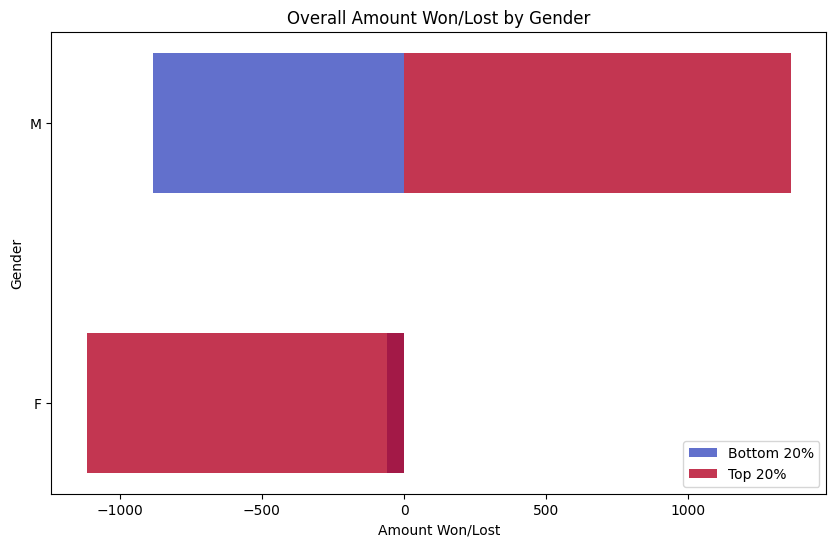

In [28]:
# Plot Gender divergent plot with outliers
# pivot_plot(combined_data, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')

# Plot Gender with no outliers
pf.pivot_plot(combined_data_NO, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')


percentile  Bottom 20%      Top 20%
age_range                          
18-24         0.000000     0.000000
25-40      -754.280029  -212.350006
41-55      -212.529999 -1317.210083
56-75       -42.149994  1752.169922
76+          66.400002    22.000000


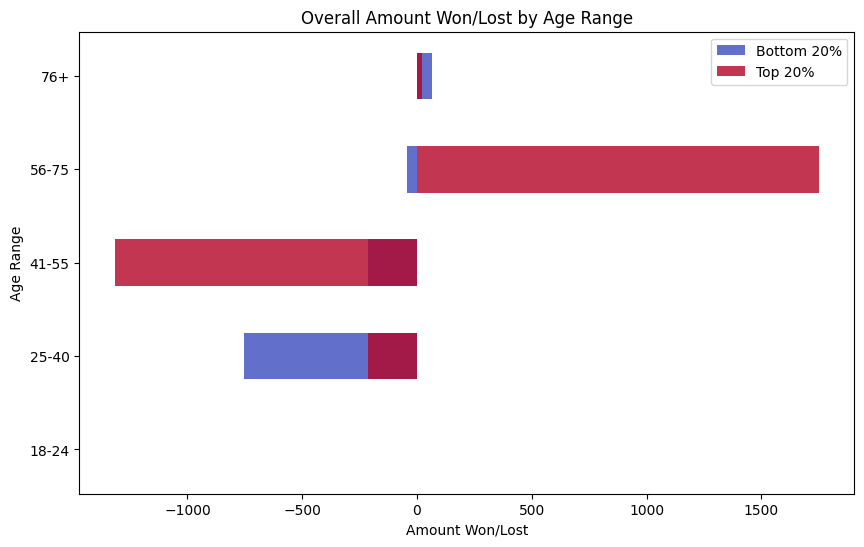

In [29]:
# Plot age_range with no outliers
pf.pivot_plot(combined_data_NO, 'age_range', 'ending_balance', y_label= 'Age Range', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Age Range')


percentile  Bottom 20%      Top 20%
rank                               
1.0         -68.910004    14.849995
2.0         -55.349998  1519.310059
3.0        -691.809998  -867.930115
6.0        -126.489990  -421.619995


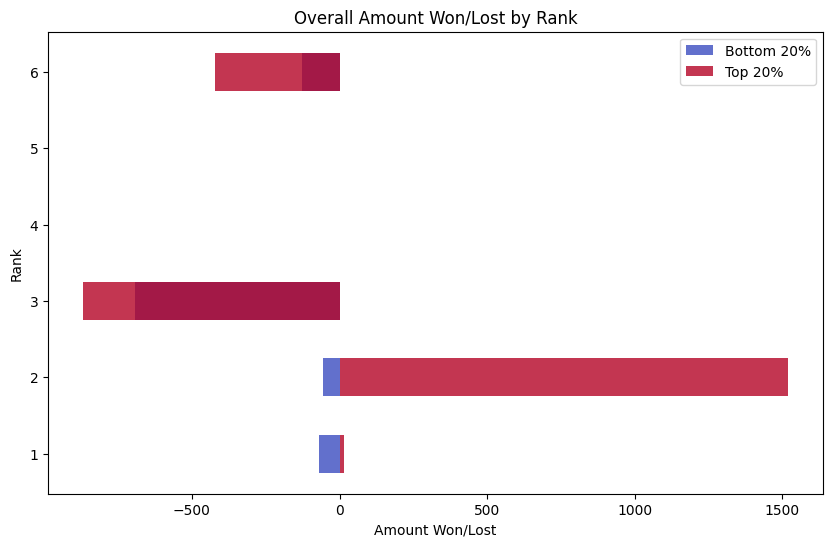

In [30]:
# Plot rank with no outliers
pf.pivot_plot(combined_data_NO, 'rank', 'ending_balance', y_label= 'Rank', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Rank')


##### Per Vist Gains/Loses

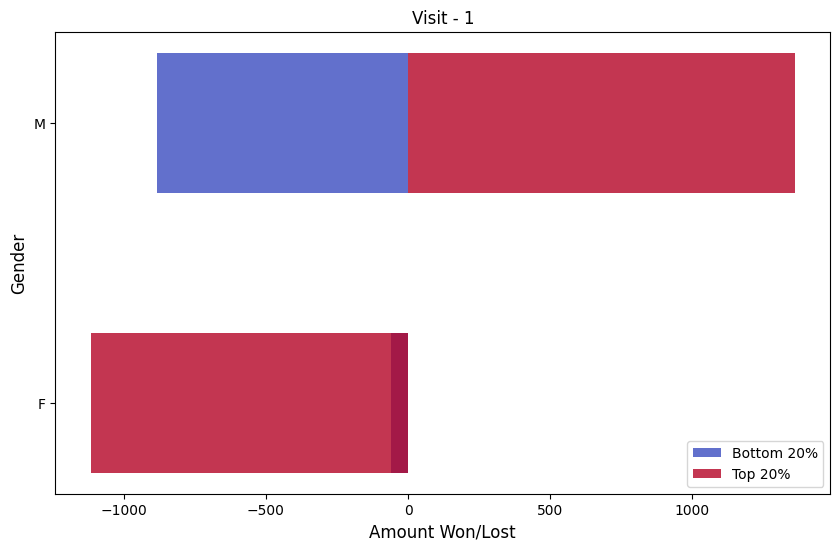

In [31]:
# Plot divergent table by visit on 'gender'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='gender', x='ending_balance', y_label= 'Gender', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'gender']).sum(numeric_only=True))

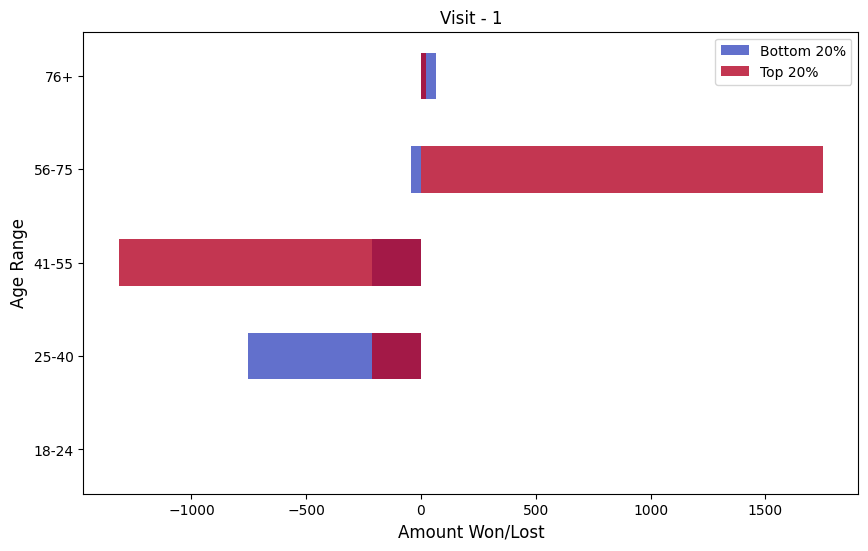

In [32]:
# Plot divergent table by visit on 'age_range'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='age_range', x='ending_balance', y_label= 'Age Range', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'age_range']).sum(numeric_only=True))

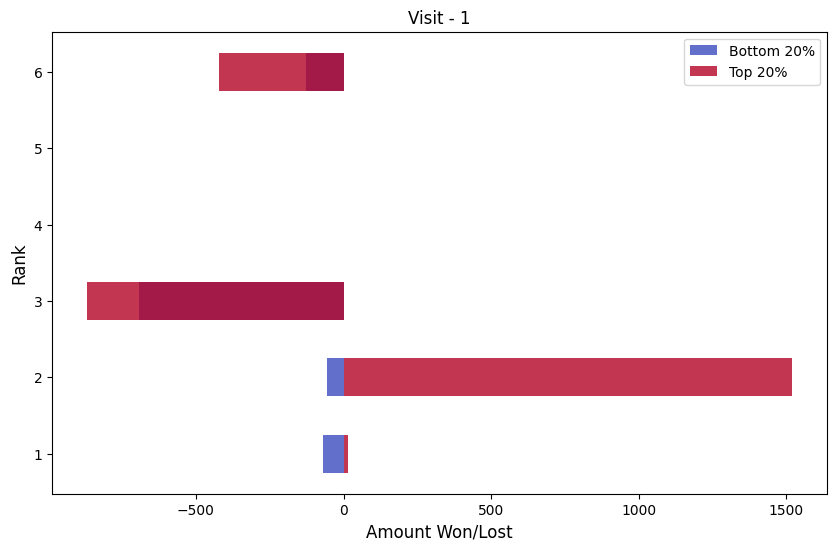

In [33]:
# Plot divergent table by visit on 'rank'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='rank', x='ending_balance', y_label= 'Rank', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'rank']).sum(numeric_only=True))

#### Per Session

In [34]:
df_all_s = pf.merge_dfs_per_player(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', print_results=True)

Total amount won or lost in each session_time bottom 20%:
session_time
1   -1040.050049
2      -2.059996
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each gender in bottom 20%:
gender
F   -159.179993
M   -882.929993
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each age range in bottom 20%:
age_range
18-24      0.000000
25-40   -853.780029
41-55   -212.580002
56-75    -42.149998
76+       66.400002
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each rank in bottom 20%:


KeyError: 'rank'

In [ ]:
# Simultaneous Play
df_b20_sim_s = pf.simultaneous_play(40000, df_bottom_20, 'session_time')
df_t20_sim_s = pf.simultaneous_play(40000, df_top_20, 'session_time')

# Concat the two dataframes
df_sim_s = pd.concat([df_b20_sim_s, df_t20_sim_s]).reset_index()

print(df_sim_s)
# Remove repeated instances
df_sim_no_repeat_s = df_sim_s.drop_duplicates(subset=['session_time', 'playerkey'])

print(df_sim_no_repeat_s)

   index session_time playerkey
0      0            1        90
1      1            1        90
2      2            1       144
3      3            1       363
4      4            1       475
5      5            2        38
   index session_time playerkey
0      0            1        90
2      2            1       144
3      3            1       363
4      4            1       475
5      5            2        38


In [ ]:
# Merge Sim play
df_all_s['sim_play'] = df_all_s[['playerkey', 'session_time']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat_s[['playerkey', 'session_time']].values)), axis=1)

print(df_all_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'rank', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'std_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']

df_all_s = df_all_s.reindex(columns=desired_order)

Index(['index', 'playerkey', 'session_time', 'rank', 'gender', 'age_range',
       'age_gen', 'beginning_amt', 'ending_amt', 'ending_balance',
       'ave_slotdenom', 'std_slotdenom', 'min_slotdenom', 'max_slotdenom',
       'ave_theo_payback', 'min_theo_payback', 'max_theo_payback',
       'ave_wageramt', 'std_wageramt', 'min_wager', 'max_wager', 'ave_p/b',
       'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', '#inc_slotdenom',
       '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       'machines_changes', '#W', '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g',
       'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', '3ws_profit',
       '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', 'ave_time_per_gamble',
       'std_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
       'total_duration', 'total_gambles', 'unique_machines',
       'ave_time_per_machine', 'w/min', 'l/min'

##### Distribution Ending Balances

Text(0.5, 0.98, 'Ending Balance by Visit')

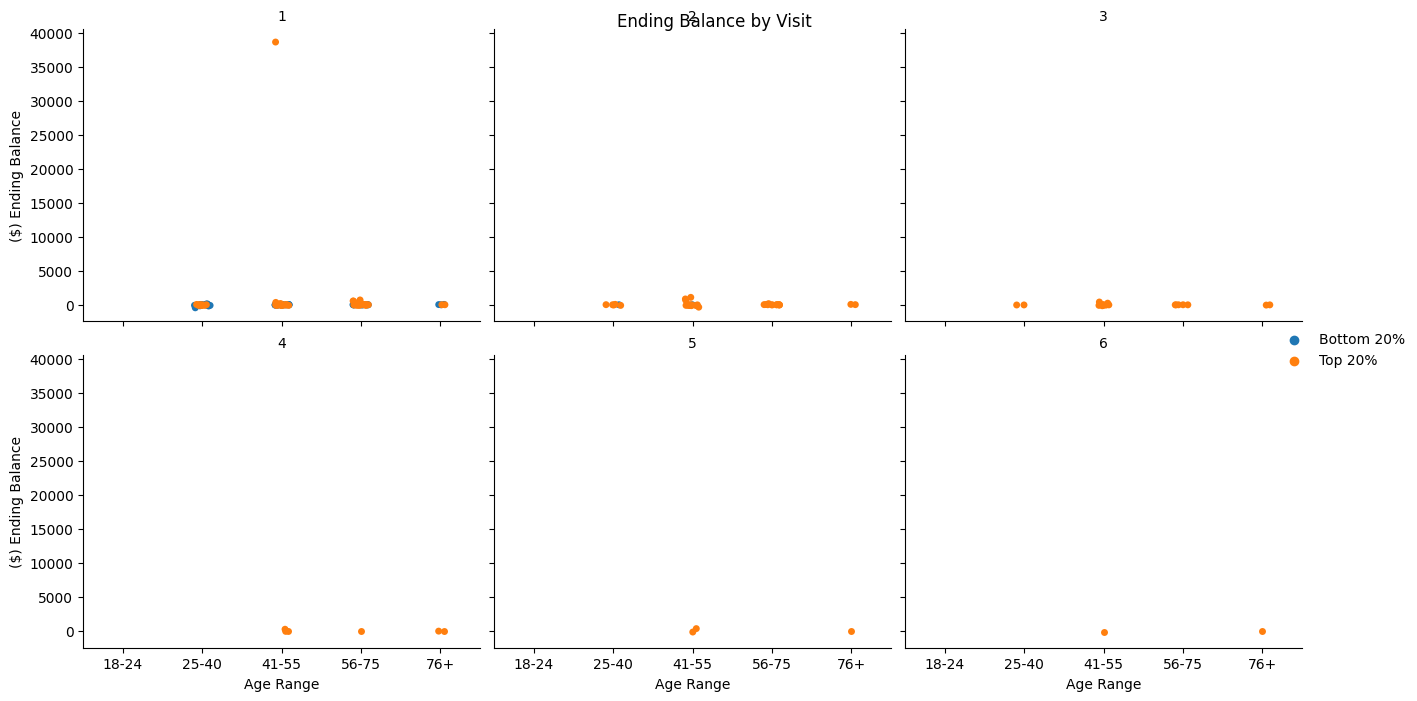

In [ ]:
# Save dataframe to paquet file
df_all_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


Outlier Players with gains greater than $10,000:
     playerkey  rank  ending_balance percentile
142        264   3.0    38614.140625    Top 20%
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, rank, ending_balance, percentile]
Index: []


Text(0.5, 0.98, 'Ending Balance by Session')

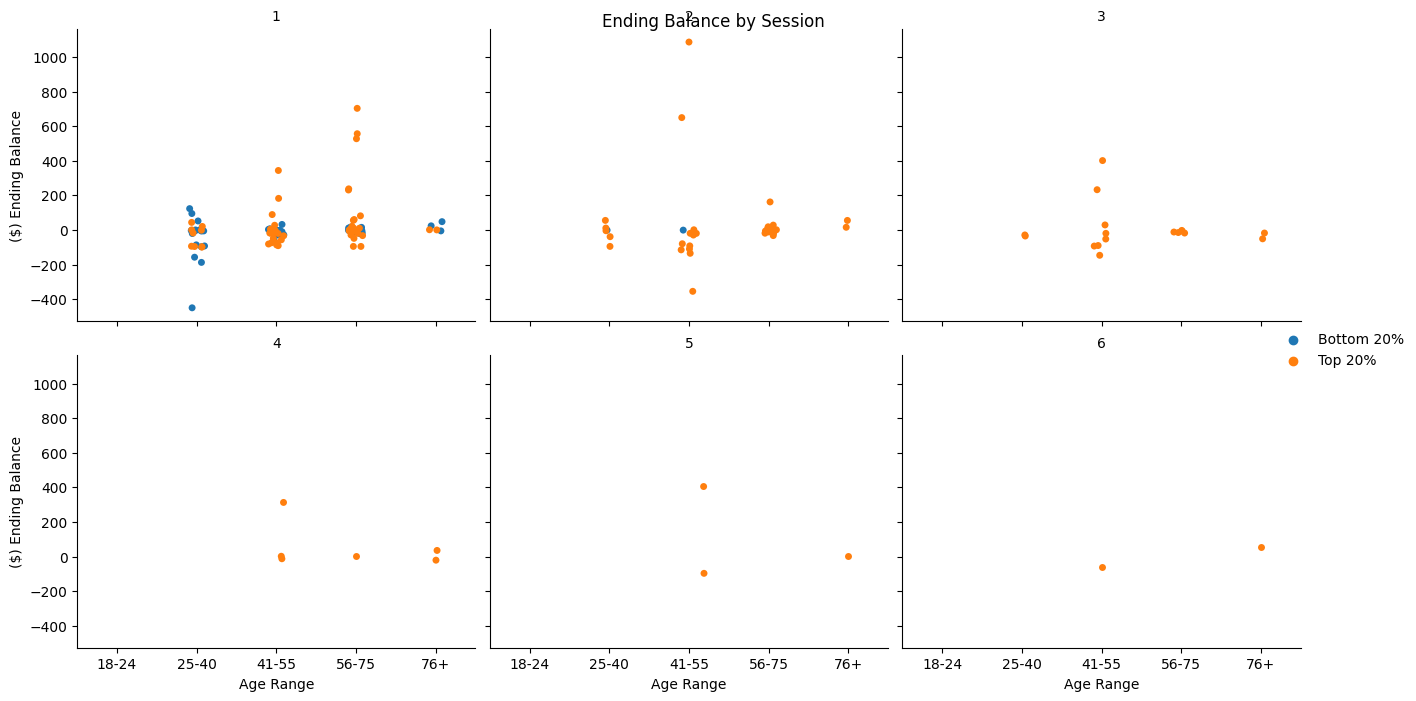

In [ ]:
# Outliers - Players who make over the cut_off
df_no_outliers_s = pf.remove_outliers(df_all_s, cut_off=cut_off)
# Save dataframe to paquet file
df_no_outliers_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_NO.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Session', fontsize=12)


##### Overall Gains/Loses

In [ ]:
# With Outliers Present
combined_data_s = pf.merge_dfs_overall(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%     -159.179993
        Top 20%       40506.878906
M       Bottom 20%     -882.929993
        Top 20%        2370.560059
Name: ending_balance, dtype: float32
-------------------------------------------------------
session_time  gender  percentile
1             F       Bottom 20%     -157.119995
                      Top 20%       39262.929688
              M       Bottom 20%     -882.929993
                      Top 20%        1157.910034
2             F       Bottom 20%       -2.059996
                      Top 20%        1343.520020
              M       Bottom 20%        0.000000
                      Top 20%         412.739929
3             F       Top 20%        -199.550003
              M       Top 20%         273.990021
4             F       Top 20%          39.750000
              M       Top 20%         279.769989
5             F       Top 20%           4.860000
              M       Top 20%         308.200012
6     

In [ ]:
# No Outliers
combined_data_s_NO = pf.merge_dfs_overall(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_s_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session_NO.parquet')

Bottom 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
[]
-----------------------------------------------------------------
Top 20%
Outlier Players with gains greater than $10,000:
       playerkey  rank age_range gender  ending_balance
45072        264   3.0     41-55      F    38614.140625
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, rank, age_range, gender, ending_balance]
Index: []
[264]
Without Outliers present:
                   ending_balance
gender percentile                
F      Bottom 20%     -159.179993
       Top 20%        1042.739868
M      Bottom 20%     -882.929993
       Top 20%        2370.560059
-------------------------------------------------------
                                ending_balance
session_tim

In [ ]:
# Plot Gender with no outliers
pf.pivot_plot(combined_data_s_NO, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')

In [ ]:
# Plot age_range with no outliers
pf.pivot_plot(combined_data_s_NO, 'age_range', 'ending_balance', y_label= 'Age Range', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Age Range')

In [ ]:
# Plot rank with no outliers
pf.pivot_plot(combined_data_s_NO, 'rank', 'ending_balance', y_label= 'Rank', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Rank')

##### Per Sessions Gains/Loses

In [ ]:
# Plot divergent table by visit on 'gender'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='gender', x='ending_balance', y_label= 'Gender', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'gender']).sum(numeric_only=True))

In [ ]:
# Plot divergent table by visit on 'age_range'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='age_range', x='ending_balance', y_label= 'Age Range', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'age_range']).sum(numeric_only=True))


In [ ]:
# Plot divergent table by visit on 'rank'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='rank', x='ending_balance', y_label= 'Rank', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'rank']).sum(numeric_only=True))
